군집분석

Contents
<div id="toc"></div>

# 1. 군집분석 개념

- 각 객체의 **유사성을 측정** 하여 비슷한 특성을 가진 그룹을 찾는데 사용되는 분석 방법
- 예를 들어, 사람들의 나이와 경제적인 수입이 유사한 그룹을 찾아내어 해당 그룹의 공통적인 특성, 즉 직업이나 거주지역, 근무환경 등을 분류 할 수 있음


- 몇 개의 그룹이 나올지 모름, 예상하지 못했던 그룹을 통해 분석 및 파악

<img src="img/1.png" width="40%">

- 활용
    - 사람들의 키와 체중을 대상으로 군집 분석 수행
    - 화물 배송 경로 개선
        - 고객 위치를 기준으로 유사한 지역 군집
        - 투입 차량 16대 -> 14대로 감소
        - 차량 이동거리 평균 66.08km에서 56.61km로 감소
        
<img src="img/2.png" width="40%">

# 1.1. 유사성

- 거리는 유사성의 종류 중 하나
- 거리함수 d를 Euclidean distance 로 사용
    - 상점의 좌표 (x, y)

<img src="img/3.png" width="70%">

# 2. 분할 기반 알고리즘

- 객체들을 대상으로 k개의 군집으로 분할을 수행
- 주어진 k에 선택한 분할 기준을 최적화할 수 잇는 k개의 군집을 찾음
    - 반복적으로 수많은 분할을 수행 검토함
    - 각 군집은 중심점에 의해 표현됨
    - 객체들이 어느 중심점에 가까운가에 따라 군집을 결정함
    
 
- 반복을 통해 좋은 결과를 찾아냄

## 2.1. K-Means 군집 분석 알고리즘

- 대부분 분할 알고리즘은 k-Means 기반임 


- 주어진 k로, k-means 알고리즘은 4단계로 수행함
    - 모든 객체들을 k개의 그룹으로 분할함
    - 분할한 클러스터 내의 객체들로부터 새로 seed 객체를 탐색, 클러스터의 중심(또는 평균) 값을 centroid로 정함
    - 각 객체들을 인접한 seed 객체로 할당함
    - 클러스터가 변화하지 않을때까지 2번째 단계부터 반복함

### 2.1.1. 예시

- 물류업체는 택배배송을 위해 각 택배 도착지까지 배송거리를 최소화
- 각 도착지를 모두 오가는 비용을 줄이고자, 중간지점을 찾아 인접 도착지들로 배송
- 도착지들을 군집분석을 수행, 인접한 도착지 군집을 분석
- 거리를 최소로 하는 군집을 찾기 위해 K-means 수행

<img src="img/4.png" width="70%">

**1회차**
- 출발지로부터 도착지들의 거리를 1-d 클러스터링 수행
- {2km, 4km, 10km, 12km, 3km, 20km, 30km, 11km, 25km}
- 임의의 군집 중심: $m_{1}$ = 3, $m_{2}$ = 4
<img src="img/5.png" width="70%">
- 각 중심에 가까운 군집#1, 군집#2 생성
- 각 군집#1, 군집#2의 새 중심 계산
- 중심#1 = (2+3)/2 = 2.5
- 중심#2 = (4+10+11+12+20+25+30)/7 = 16

**2회차**
- 중심#1=2.5, 중심#2=16
- 각 중심에 가까운 군집#1, 군집#2 생성
<img src="img/6.png" width="70%">
- 각 군집#1, 군집#2의 새 중심 계산
- 중심#1= (2+3+4) /3=3
- 중심#2= (10+11+12+20+25+30)/6=18

**3회차**
- 중심#1=3, 중심#2=18
- 각 중심에 가까운 군집#1, 군집#2 생성
<img src="img/7.png" width="70%">
- 각 군집#1, 군집#2의 새 중심 계산
    - 중심#1= 4.75
    - 중심#2= 19.6

**4회차**
- 중심#1=4.75, 중심#2=19.6
- 각 중심에 가까운 군집#1, 군집#2 생성
<img src="img/8.png" width="70%">
- 각 군집#1, 군집#2의 새 중심 계산
    - 중심#1= 7
    - 중심#2= 25
- 중심#1, #2에 대해 더 이상 군집의 변화가 없으므로 군집분석 종료

### 2.1.2. PYTHON 실습1. 1차원 클러스터링 예제

In [46]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_samples, silhouette_score  # 군집분석 결과 
from pandas import DataFrame
import matplotlib.pyplot as plt
#import matplotlib.cm as cm
import numpy as np
import pandas as pd
#import math
#import timeit

# 그래프가 바로 출력되도록, 보통 연산한다고 그래프 늦게 출력
%matplotlib inline 

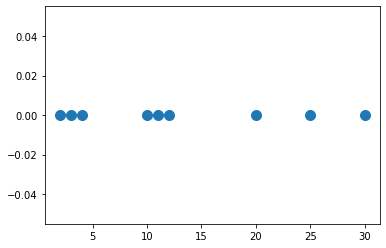

In [47]:
X = np.array([[2, 0], [3, 0], [4, 0], [10, 0], [11, 0], [12, 0], [20, 0], [25, 0], [30, 0]])
plt.scatter(X[:,0], X[:, 1], s= 100)
plt.show()

In [48]:
####### k-means 1회차
model1 = KMeans(n_clusters = 2, init = np.array([[3, 0], [4, 0]]), n_init = 1, max_iter = 1, random_state = 1).fit(X)
# init = 초기 중심
# n_init = 매번 다른 centroid seeds로 KMeans 알고리즘을 돌릴 횟수 -> 이 중 제일 좋은 결과를 찾음
# max_iter = 최대 반복 횟수

c0, c1 = model1.cluster_centers_
c0, c1

(array([2.5, 0. ]), array([16.,  0.]))

In [49]:
# 값이 적을 수록 중시에 가까이 있다.
# 부호 무시. 거리의 제곱의 형태 
model1.score(X)

-372.75

In [50]:
def kmeans_df(model, c0, c1):
    df = pd.DataFrame(np.hstack([X,
                                np.linalg.norm(X - c0, axis = 1)[:, np.newaxis],
                                np.linalg.norm(X - c1, axis = 1)[:, np.newaxis],
                                model.labels_[:, np.newaxis]]),
                     columns=['x', 'y', '거리1', '거리2', '번호'])
    return df

In [51]:
kmeans_df(model1, c0, c1)

,x,y,거리1,거리2,번호
0,2.0,0.0,0.5,14.0,0.0
1,3.0,0.0,0.5,13.0,0.0
2,4.0,0.0,1.5,12.0,0.0
3,10.0,0.0,7.5,6.0,1.0
4,11.0,0.0,8.5,5.0,1.0
5,12.0,0.0,9.5,4.0,1.0
6,20.0,0.0,17.5,4.0,1.0
7,25.0,0.0,22.5,9.0,1.0
8,30.0,0.0,27.5,14.0,1.0


In [52]:
def plot_cluster(model, c0, c1):
    plt.scatter(X[model.labels_ == 0,0],
               X[model.labels_ == 0,1], s = 100, marker = 'v', c = 'r')
    plt.scatter(X[model.labels_ == 1,0],
               X[model.labels_ == 1,1], s = 100, marker = '^', c = 'b')
    plt.scatter(c0[0], c0[1], s=300, c='r')
    plt.scatter(c1[0], c1[1], s=300, c='b')
    plt.show()

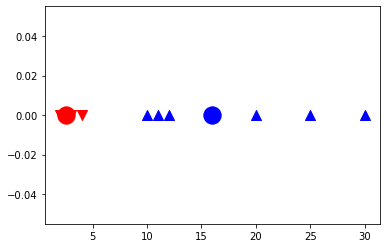

In [53]:
plot_cluster(model1, c0, c1)

In [57]:
def calc_new_centroid(model):
    c0_new = (X[model.labels_ == 0, 0].mean(), X[model.labels_ == 0, 1].mean())
    c1_new = (X[model.labels_ == 1, 0].mean(), X[model.labels_ == 1, 1].mean())
    return c0_new, c1_new

In [58]:
calc_new_centroid(model1)

((3.0, 0.0), (18.0, 0.0))

In [59]:
####### k-means 2회차
model1 = KMeans(n_clusters = 2, init = np.array([[2.5, 0. ], [16.,  0.]]), n_init = 1, max_iter = 1, random_state = 1).fit(X)
c0, c1 = model1.cluster_centers_
c0, c1

(array([3., 0.]), array([18.,  0.]))

In [60]:
model1.score(X)

-333.0

In [61]:
kmeans_df(model1, c0, c1)

,x,y,거리1,거리2,번호
0,2.0,0.0,1.0,16.0,0.0
1,3.0,0.0,0.0,15.0,0.0
2,4.0,0.0,1.0,14.0,0.0
3,10.0,0.0,7.0,8.0,0.0
4,11.0,0.0,8.0,7.0,1.0
5,12.0,0.0,9.0,6.0,1.0
6,20.0,0.0,17.0,2.0,1.0
7,25.0,0.0,22.0,7.0,1.0
8,30.0,0.0,27.0,12.0,1.0


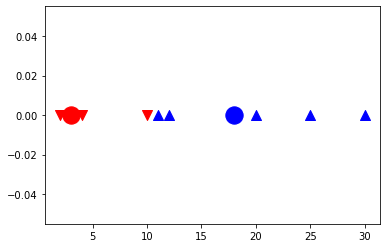

In [62]:
plot_cluster(model1, c0, c1)

In [64]:
calc_new_centroid(model1)

((4.75, 0.0), (19.6, 0.0))

In [65]:
####### k-means 3회차
model1 = KMeans(n_clusters = 2, init = np.array([[3., 0.], [18.,  0.]]), n_init = 1, max_iter = 1, random_state = 1).fit(X)
c0, c1 = model1.cluster_centers_
c0, c1

(array([4.75, 0.  ]), array([19.6,  0. ]))

In [66]:
model1.score(X)

-267.85499999999996

In [67]:
kmeans_df(model1, c0, c1)

,x,y,거리1,거리2,번호
0,2.0,0.0,2.75,17.6,0.0
1,3.0,0.0,1.75,16.6,0.0
2,4.0,0.0,0.75,15.6,0.0
3,10.0,0.0,5.25,9.6,0.0
4,11.0,0.0,6.25,8.6,0.0
5,12.0,0.0,7.25,7.6,0.0
6,20.0,0.0,15.25,0.4,1.0
7,25.0,0.0,20.25,5.4,1.0
8,30.0,0.0,25.25,10.4,1.0


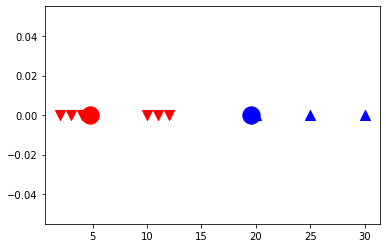

In [68]:
plot_cluster(model1, c0, c1)

In [69]:
calc_new_centroid(model1)

((7.0, 0.0), (25.0, 0.0))

In [70]:
####### k-means 4회차
model1 = KMeans(n_clusters = 2, init = np.array([[4.75, 0.  ], [19.6,  0. ]]), n_init = 1, max_iter = 1, random_state = 1).fit(X)
c0, c1 = model1.cluster_centers_
c0, c1

(array([7., 0.]), array([25.,  0.]))

In [71]:
model1.score(X)

-150.0

In [72]:
kmeans_df(model1, c0, c1)

,x,y,거리1,거리2,번호
0,2.0,0.0,5.0,23.0,0.0
1,3.0,0.0,4.0,22.0,0.0
2,4.0,0.0,3.0,21.0,0.0
3,10.0,0.0,3.0,15.0,0.0
4,11.0,0.0,4.0,14.0,0.0
5,12.0,0.0,5.0,13.0,0.0
6,20.0,0.0,13.0,5.0,1.0
7,25.0,0.0,18.0,0.0,1.0
8,30.0,0.0,23.0,5.0,1.0


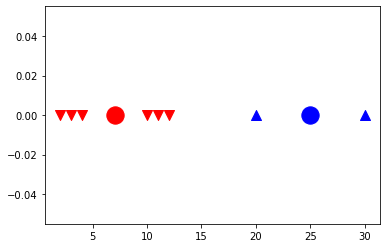

In [73]:
plot_cluster(model1, c0, c1)

In [74]:
calc_new_centroid(model1)
# 더 이상 안 바뀜

((7.0, 0.0), (25.0, 0.0))

In [75]:
####### k-means 5회차
model1 = KMeans(n_clusters = 2, init = np.array([[7., 0.], [25.,  0.]]), n_init = 1, max_iter = 1, random_state = 1).fit(X)
c0, c1 = model1.cluster_centers_
c0, c1

# 더 이상 안 바뀜

(array([7., 0.]), array([25.,  0.]))

---

In [42]:
####### k-means 일반적인 방법
model1 = KMeans(n_clusters = 2, init = 'random', n_init = 10, max_iter = 50).fit(X)
c0, c1 = model1.cluster_centers_
c0, c1

(array([7., 0.]), array([25.,  0.]))

## 2.2. k-Means 분석 결과 비교

<img src="img/9.png" width="70%">

- Importance of Choosing Initial Centroids   
**초기값 or 중심 설정에 따라 달라짐**

**예시 1)**
<img src="img/10.png" width="70%">

**예시 2)**
<img src="img/11.png" width="70%">

# 3. k-Means 군집 평가

- 가장 보편적으로 Sum of Squared Error (SSE) 사용
    - 각 객체마다 인접한 클러스터와의 거리로 구함
    <img src="img/5.png" width="70%">
    - $k_{1}$={2,3}, $k_{2}$={4,10,11,12,20,25,30} $m_{1}$=3, $m_{2}$=4
    - SSE= ∑ |$k_{i}$– $m_{i}$|= 1+0+0+6+7+8+16+21+26=85

- SSE는 거리 제곱의 합으로 정의됨  

  
$$
SSE = \sum\limits_{i = 1}^{K}\sum\limits_{x\in\mathbb{C_{i}}} dist^{2}(m_{i}, x)
$$

- x: 군집 Ci 내의 데이터 객체, mi 해당 군집에서의 중심(대표)객체
    - mi 이 군집의 평균 중심에 가까운 것을 산출
- 두 클러스터 결과로부터 최소 에러의 결과를 선택할 수 있음
- SSE를 줄이는 방법으로 클러스터 군집의 수 k 를 증가시킬 수 있음
    - 작은 k에서의 좋은 분석 결과는 높은 k에서의 나쁜 분석 결과보다 낮은 SSE를 가짐


## 3.1 응집도(Cohesion)와 분리도(Separation)

- 응집도와 분리도는 그래프 기반으로 해석가능 함
    - 클러스터 응집도는 클래스터 내의 모든 거리 가중치의 합으로 표현
    - 클러스터 분리도는 클러스터 외부 객체 간의 모든 거리 가중치의 합으로 표현됨
<img src="img/12.png" width="70%">

예시 #1
<img src="img/5.png" width="80%">
- $k_{1}$={2,3}, $k_{2}$={4,10,11,12,20,25,30} $m_{1}$=3, $m_{2}$=4 m=58.5
- SSE = ∑ $|k_{i}– m_{i}|= 1+0+0+6+7+8+16+21+26=85$
- 분리도 = $2*(13-3)^{2}+7*(13-4)^{2}=200+81*7=200+567=767$

- 클러스터 응집도 : 한 클러스터 내의 객체들이 밀집해있는 정도를 측정함 (SSE)
    - 응집도는 클러스터 내의 “sum of squares (SSE)” 값으로 측정
$$
WSS = \sum\limits_{i}\sum\limits_{x\in\mathbb{C_{i}}} (x - m_{i})^{2}
$$


- 클러스터 분리도: 한 클러스터가 다른 클러스터와 잘 분리되어 있는 정도를 측정함
    - 분리도는 클러스터 외부 객체와의 “sum of squares”으로 측정함
$$
BSS = \sum\limits_{i}|C_{i}|(m - m_{i})^{2}
$$
    - Where |Ci| is the size of cluster i

## 3.2. 유사도 매트릭스

- 유사도 매트릭스
    - x, y 축의 한 값이 각각의 데이터 객체로 표현됨
    - x, y 쌍의 객체가 동일한 클러스터에 위치한다면 ‘1’의 값
    - x, y 쌍의 객체가 서로 다른 클러스터에 위치한다면 ‘0’의 값
- 일부 밀도기반의 군집이나 연속성 기반의 군집에는 적절하지 않을 수 있음
<img src="img/13.png" width="70%">

<img src="img/14.png" width="70%">

- 군집분석 결과 포함된 군집의 번호 순서대로 객체들을 정렬함
<img src="img/17.png" width="70%">
- 랜덤 객체를 대상으로 유사성 매트릭스는 좋은 값이 나오지 않음
<img src="img/18.png" width="70%">

## 3.3. 엔트로피 기반의 군집평가

- 각 군집의 엔트로피를 측정하여 군집 평가에 사용함  
    (엔트로피 값이 낮을수록 좋은 군집으로 평가함)
<img src="img/15.png" width="70%">

$$
Entropy = - \sum\limits_{i=1}^{2}P_{i}log_{2}P_{i}
$$

<img src="img/16.png" width="70%">

## 3.4.  PYTHON 실습2. 군집평가

In [77]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score  # 군집분석 결과 
from pandas import DataFrame
from scipy.stats import entropy
from math import log, e
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import math
import timeit

# 그래프가 바로 출력되도록, 보통 연산한다고 그래프 늦게 출력
%matplotlib inline 

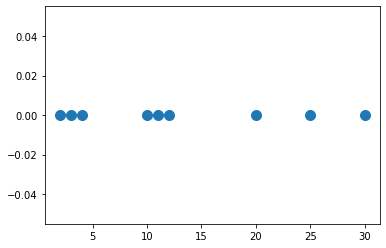

In [78]:
X = np.array([[2, 0], [3, 0], [4, 0], [10, 0], [11, 0], [12, 0], [20, 0], [25, 0], [30, 0]])
plt.scatter(X[:,0], X[:, 1], s= 100)
plt.show()

In [79]:
# k-means 1회차
model1 = KMeans(n_clusters = 2, init = np.array([[3, 0], [4, 0]]), n_init = 1, max_iter = 1, random_state = 1).fit(X)
c0, c1 = model1.cluster_centers_
c0, c1

(array([2.5, 0. ]), array([16.,  0.]))

In [80]:
#### 1. SSE 측정
model1.score(X)

-372.75

In [81]:
X[model1.labels_,0]  # 군집 분포 확인

array([2, 2, 2, 3, 3, 3, 3, 3, 3])

In [82]:
np.mean(X[:,0]),np.mean(X[model1.labels_ == 0, 0])\
, np.count_nonzero(X[model1.labels_, 0] == 2), np.mean(X[model1.labels_ == 0, 0])

(13.0, 3.0, 3, 3.0)

In [84]:
np.mean(X[:,0]),np.mean(X[model1.labels_ == 1, 0])\
, np.count_nonzero(X[model1.labels_, 0] == 3), np.mean(X[model1.labels_ == 1, 0])

(13.0, 18.0, 6, 18.0)

In [199]:
def k_cohesion(model1, c0, c1):  # 분리도 함수
    total_mean = np.mean(X[:, 0])  # 전체 평균
    m1 = np.mean(X[model1.labels_ == 0, 0])  # 라벨이 0인 군집의 평균
    m2 = np.mean(X[model1.labels_ == 1, 0])  # 라벨이 1인 군집의 평균
    
    # 내부 코드가 label이 바뀌는 경우가 있음 -> 2, 3
    count1 = np.count_nonzero(X[model1.labels_, 0] == 2)   # 1번 군집의 개수
    count2 = np.count_nonzero(X[model1.labels_, 0] == 3)   # 2번 군집의 개수
    separation = count1*(total_mean - m1)**2 + count2*(total_mean - m2)**2
    print(separation)

In [91]:
#### 2. Cohesion 측정
k_cohesion(model1, c0, c1)

450.0


In [94]:
list1 = []
list1.clear()
np.count_nonzero(X)  # 데이터 수

9

In [96]:
def s_matrix(model1):
    for i in range(0, np.count_nonzero(X)):
        list1.append([])
        for j in range(0, np.count_nonzero(X)):
            if model1.labels_[i] == model1.labels_[j]:
                list1[i].append(1)
            else :
                list1[i].append(0)

In [97]:
#### 3. 유사성 매트릭스 평가
s_matrix(model1)
list1

[[1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1]]

In [98]:
#### 4. entropy 평가

In [112]:
def entropy(labels):
    # Computes entropy of 0-1 vector.
    n_labels = len(labels)
    
    if n_labels <= 1:
        return 0
    
    counts = np.bincount(labels)
    probs = counts[np.nonzero(counts)] / n_labels   # nonzero : 0아닌 bin들의 index List를 출력
    
    n_classes = len(probs)
    
    if n_classes <= 1:
        return 0
    return -np.sum(probs * np.log(probs)) / np.log(n_classes)

In [113]:
entropy(model1.labels_)

0.9182958340544894

## 3.5. 군집 비교

### 3.5.1. Cohesion and Separation 군집 비교

<img src="img/19.png" width="70%">

### 3.5.2. 군집 비교 - 유사도 매트릭스

<img src="img/20.png" width="70%">

### 3.5.3. 군집 비교 - 엔트로피

<img src="img/21.png" width="70%">

## 3.6. PYTHON 실습3. 군집평가 비교

In [175]:
# k-means 1회차
model1 = KMeans(n_clusters = 2, init = np.array([[3, 0], [4, 0]]), n_init = 1, max_iter = 1, random_state = 1).fit(X)
c0, c1 = model1.cluster_centers_
c0, c1

(array([2.5, 0. ]), array([16.,  0.]))

In [176]:
# k-means 10회차
model10 = KMeans(n_clusters = 2, init = np.array([[3, 0], [4, 0]]), n_init = 1, max_iter = 10, random_state = 1).fit(X)
c100, c101 = model10.cluster_centers_
c100, c101

(array([7., 0.]), array([25.,  0.]))

In [177]:
# 1. SSE 측정
model1.score(X), model10.score(X)

(-372.75, -150.0)

In [178]:
X[model1.labels_, 0]

array([2, 2, 2, 3, 3, 3, 3, 3, 3])

In [179]:
print("----- model1 -----")
print('전체 평균 :',np.mean(X[:,0]))
print('군집1 평균 :',np.mean(X[model1.labels_ == 0, 0]), ', 군집1 원소 수 :', np.count_nonzero(X[model1.labels_, 0] == 2))
print('군집2 평균 :',np.mean(X[model1.labels_ == 1, 0]), ', 군집2 원소 수 :', np.count_nonzero(X[model1.labels_, 0] == 3))

----- model1 -----
전체 평균 : 13.0
군집1 평균 : 3.0 , 군집1 원소 수 : 3
군집2 평균 : 18.0 , 군집2 원소 수 : 6


In [180]:
print("----- model10 -----")
print('전체 평균 :',np.mean(X[:,0]))
print('군집1 평균 :',np.mean(X[model10.labels_ == 0, 0]), ', 군집1 원소 수 :', np.count_nonzero(X[model10.labels_, 0] == 2))
print('군집2 평균 :',np.mean(X[model10.labels_ == 1, 0]), ', 군집2 원소 수 :', np.count_nonzero(X[model10.labels_, 0] == 3))

----- model10 -----
전체 평균 : 13.0
군집1 평균 : 7.0 , 군집1 원소 수 : 6
군집2 평균 : 25.0 , 군집2 원소 수 : 3


In [187]:
# 2. Cohesion 측정

In [202]:
print('1회차 분리도')
k_cohesion(model1, c0, c1)
print('----------------------')
print('10회차 분리도')
k_cohesion(model10, c100, c101)

1회차 분리도
450.0
----------------------
10회차 분리도
648.0


In [183]:
# 비교군집 10회차 + 3클러스터
model3 = KMeans(n_clusters = 3, init = 'random', n_init = 100, max_iter = 100, random_state = 1).fit(X)
c30, c31, c32 = model3.cluster_centers_
c30, c31, c32

(array([11.,  0.]), array([3., 0.]), array([25.,  0.]))

In [184]:
# 3. 유사성 매트릭스 평가

In [185]:
list1 = []
list1.clear()
np.count_nonzero(X)

9

In [161]:
s_matrix(model1)
list1

[[1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1]]

In [162]:
list1.clear()
s_matrix(model3)
list1

[[1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 1]]

In [164]:
# 4. Entropy 평가

In [167]:
# k-means 2회차 비교군집
model2 = KMeans(n_clusters = 2, init = np.array([[3, 0], [4, 0]]), n_init = 1, max_iter = 2, random_state = 1).fit(X)
c20, c21 = model1.cluster_centers_
c20, c21

(array([3., 0.]), array([18.,  0.]))

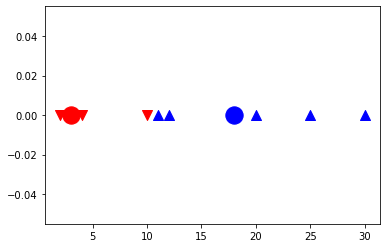

In [168]:
plot_cluster(model2, c20, c21)

In [195]:
# 1에 가까울 수록 좋다.

print('1회차 :',entropy(model1.labels_))
print('2회차 :',entropy(model2.labels_))
print('클러스터3 :',entropy(model3.labels_))

1회차 : 0.9182958340544894
2회차 : 0.9910760598382222
클러스터3 : 0.9999999999999998


# 4. Internal Measures: SSE

- 클러스터링 방법이나 외부조건과 관계없이 분석 결과 자체 정보만으로 클러스터의 우수성을 평가할 수 있음
- 두 개 이상의 클러스터링 분석 결과를 비교하거나 다른 클러스터링 방법의 결과를 서로 비교하는데 좋은 기준이 됨
- 좋은 군집의 수 k를 찾는 방법으로 사용 가능함

## 4.1.  PYTHON 실습4. SSE 기반의 k 탐색 실습

In [172]:
ks = range(1, 10)
inertias = []

for k in ks :
    model = KMeans(n_clusters = k)
    model.fit(X)
    inertias.append(model.inertia_)

inertias  # SSE값(응집도)

[798.0, 150.0, 54.0, 16.5, 4.0, 2.5, 1.0, 0.5, 0.0]

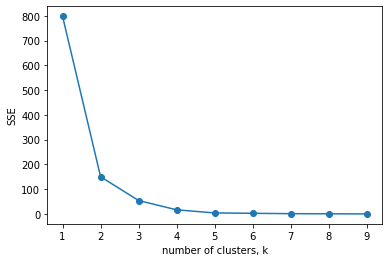

In [171]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

## 4.2. PYTHON 실습5. K-means 2차원 데이터

# 5. K-Means 기법의 특징

- 장점
    - 상대적 효율성: O(tkn), where n is # objects, k is # clusters,
      and t is # iterations. Normally, k, t << n.
    - 주로 **local optimum** 클러스터 군집을 찾음. The global optimum 군집의 경우, 다수의 초기 seed 선택,
      진화적 seed 선택 등의 개선된 기법들이 필요함


- 단점
    - 중심값을 구할 수 있는 경우에 적용가능함. 아이템 형식의 데이터를 대상으로 적용하기 어려움
    - k, **the number of clusters**가 적절히 정의되어야 함
    - 잡음 데이터나 이상치 데이터에 영향을 받음
    - 임의 모양의 클러스터 군집을 찾는데 적합하지 않음 

- 한계점
    - K-means 는 군집들이 다양성을 가질때 효율적이지 못함
        - 군집의 크기
        <img src="img/22.png" width="70%">
        - 군집의 밀도
        <img src="img/23.png" width="70%">
        - 비원형 형태의 군집
        <img src="img/24.png" width="70%">
    - K-means 이상치를 포함한 데이터 처리에 부적합함

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>